In [11]:
import numpy  as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset

In [7]:
data = pd.read_csv(r"C:\Users\hp\Downloads\train.csv")

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preparation
# Select relevant features and target

In [17]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

# Create a new feature for total bathrooms

In [21]:
data['TotalBath'] = data['FullBath'] + 0.5 * data['HalfBath']

# Update our features list to use TotalBath instead of separate bathroom features

In [25]:
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']

# Create new dataframe with only the columns we need

In [30]:
model_data = data[features + [target]].copy()

# Check for missing values

In [33]:
print("Missing values:\n", model_data.isnull().sum())

Missing values:
 GrLivArea       0
BedroomAbvGr    0
TotalBath       0
SalePrice       0
dtype: int64


# Drop rows with missing values if any

In [36]:
model_data.dropna(inplace=True)

## Feature Engineering/Scaling
# Log transform the target variable to handle skewness

In [40]:
model_data['LogSalePrice'] = np.log(model_data[target])

# We'll use the log-transformed price as our target

In [43]:
target = 'LogSalePrice'

# Split into features (X) and target (y)

In [46]:
X = model_data[features]
y = model_data[target]

# Split data into training and test sets (80% train, 20% test)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training
# Create and train the linear regression model

In [55]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Model Evaluation
# Make predictions

In [58]:
y_pred = model.predict(X_test_scaled)

# Convert predictions back from log scale

In [61]:
y_pred_actual = np.exp(y_pred)
y_test_actual = np.exp(y_test)

# Calculate metrics

In [64]:
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

In [66]:
print("\nModel Performance:")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")


Model Performance:
Root Mean Squared Error (RMSE): $52,215.01
R-squared (R²): 0.6446


## Interpretation

In [69]:
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:
GrLivArea: 0.2311
BedroomAbvGr: -0.0883
TotalBath: 0.1189
Intercept: 12.0307


## Visualization
# Plot actual vs predicted values

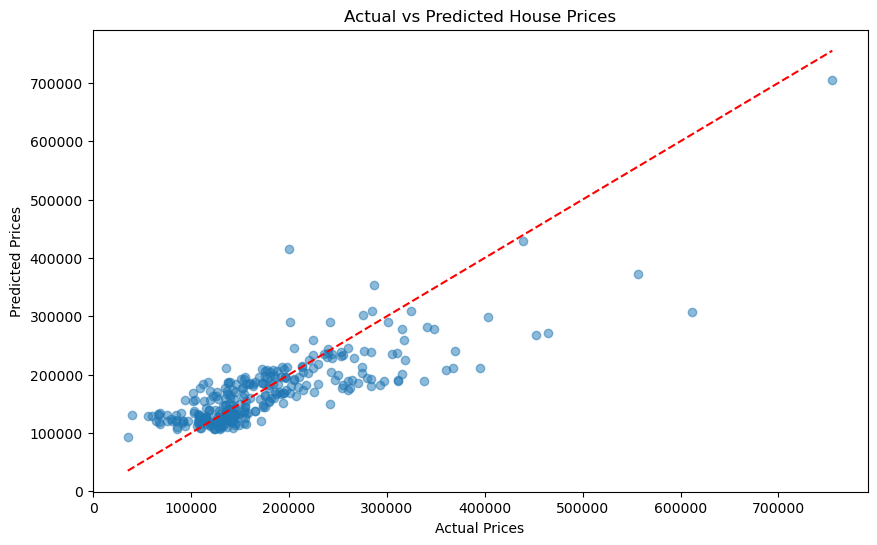

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], '--r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Residual plot

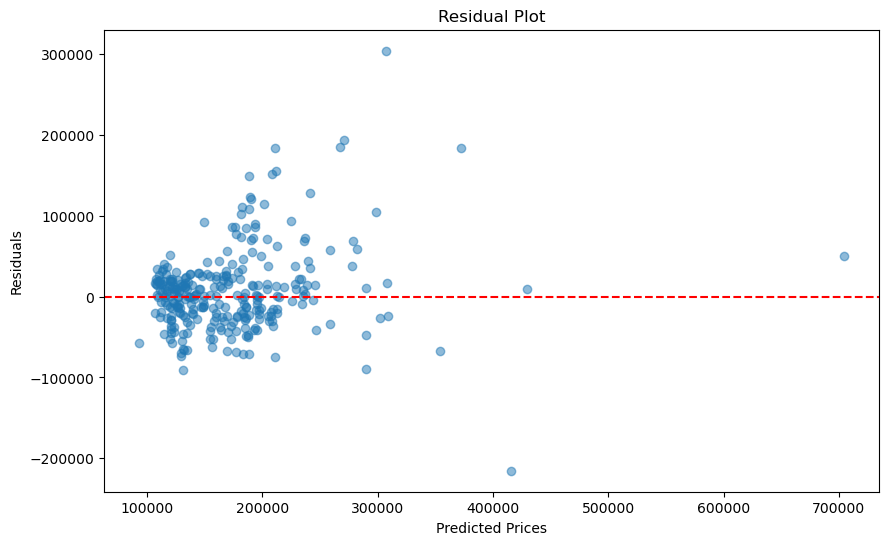

In [75]:
residuals = y_test_actual - y_pred_actual
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_actual, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()